In [1]:
import warnings

warnings.filterwarnings("ignore")


In [ ]:
# get data to use the model on
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
85,6.0,3.4,4.5,1.6
95,5.7,3.0,4.2,1.2
73,6.1,2.8,4.7,1.2
99,5.7,2.8,4.1,1.3
15,5.7,4.4,1.5,0.4


In [3]:
y_train.head()

85    1
95    1
73    1
99    1
15    0
Name: target, dtype: int64

In [4]:
from sklearn.svm import SVC

# 1. Instantiate SVC with parameters gamma, C
clf = SVC(gamma=0.001, C=100.0)

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1])

In [8]:
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
import numpy as np

# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

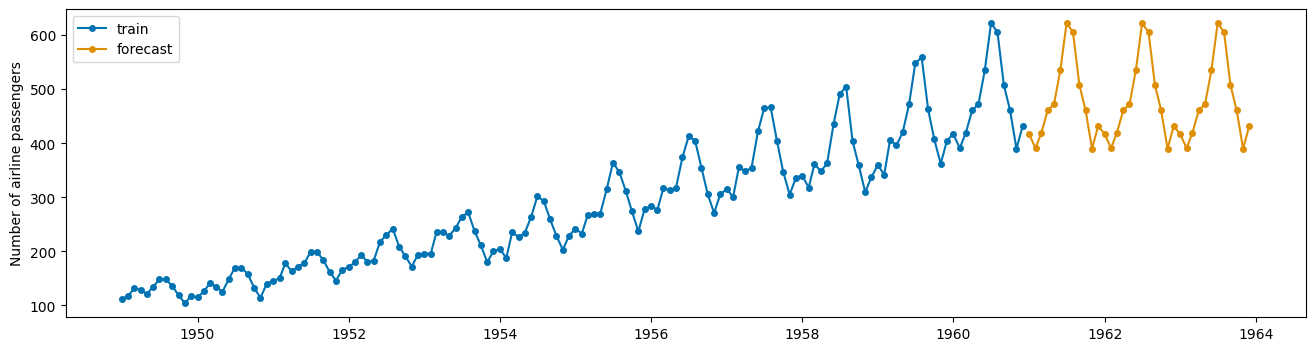

In [10]:
#plots
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y, y_pred, labels=["train", "forecast"])

In [14]:
from sktime.datasets import load_osuleaf
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels.compose_tab_to_panel import AggrDist
from sktime.dists_kernels import ScipyDist

#train data
X_train, y_train = load_osuleaf(split='train', return_type='numpy3D')

#test data

X_new, _ = load_osuleaf(split='test', return_type='numpy3D')
X_new = X_new[:2]

# step 3 - specify the classifier
mean_eucl_dist = AggrDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=mean_eucl_dist)

# step 4 - fitting the classifier
clf.fit(X_train, y_train)

# step 5 - predict labels on new data
y_pred = clf.predict(X_new)